# Resizer using Software

This reference design illustrates how to run a resize operation using **software** using Jupyter Notebooks and Python.

<img src="./images/resizenb.png" width="800" height="650"/>

In this example, we will use the **Bilinear** interpolation.

> The resize IP transforms the source image to the size of the destination image. Different types of interpolation techniques can be used in resize function,
namely: Nearest-neighbor, Bilinear, and Area interpolation. The type of interpolation can be passed as a parameter to the Python API.    
> Reference: https://www.xilinx.com/support/documentation/sw_manuals/xilinx2017_1/ug1233-xilinx-opencv-user-guide.pdf

## Contents    
 
* [Image resize using PIL library](#Image-resize-using-PIL-library)   
* [Import libraries](#Import-libraries)
* [Create an Image object](#Create-an-Image-object)
* [Display the image to be resized](#Display-the-image-to-be-resized)
* [Resizing](#Resizing)
* [Display resized image](#Display-resized-image)
* [References](#References)


## Image resize using PIL library

PIL is the **Python Imaging Library**. This library provides extensive file format support, 
an efficient internal representation, and fairly powerful image processing capabilities.

The Image module provides a class with the same name which is used to represent a PIL image. 
The module also provides a number of factory functions, including functions to load images from files, 
and to create new images.

Reference: https://pillow.readthedocs.io/en/5.2.x/reference/Image.html?highlight=Image.resize


## Import libraries

1. **PIL** library to load and resize the image   
2. **numpy** to store the pixel array of the image
3. **matplotlib** to show the image in the notebook

In [1]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Create an Image object
We will load image from the SD card and create an Image object. 
Then we create a numpy array of the pixels.

Image By Aboubakrhadnine - <span class="int-own-work" lang="en">Own work</span>, <a href="https://creativecommons.org/licenses/by-sa/4.0" title="Creative Commons Attribution-Share Alike 4.0">CC BY-SA 4.0</a>, <a href="https://commons.wikimedia.org/w/index.php?curid=79587474">Link</a>.

In [2]:
image_path = "images/sahara.jpg"
original_image = Image.open(image_path)

## Display the image to be resized

Let's also show the original image size. It may take a while to render a 
large picture. For better visual effect, we double the size of the canvas.
The following code only changes the display size, not the picture itself:

```python
canvas = plt.gcf()
size = canvas.get_size_inches()
canvas.set_size_inches(size*2)
```

Image size: 3840x2160 pixels.


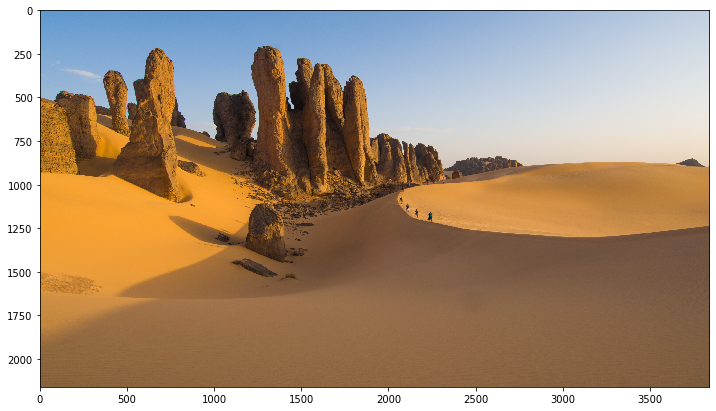

In [3]:
canvas = plt.gcf()
size = canvas.get_size_inches()
canvas.set_size_inches(size*2)

old_width, old_height = original_image.size
print("Image size: {}x{} pixels.".format(old_width, old_height))
_ = plt.imshow(original_image)

## Resizing
We will set image resize dimensions.

In [4]:
resize_factor = 2
new_width = int(old_width/resize_factor)
new_height = int(old_height/resize_factor)

We will use `resize()` method from the PIL library.
We map multiple input pixels to a single output pixels to downscale the image   
The Python Imaging Library provides different resampling filters. 
We will just choose the bilinear filter in our example.
Pick one nearest pixel from the input image. Ignore all other input pixels.

In [5]:
resized_image = original_image.resize((new_width, new_height), Image.BILINEAR)

## Display resized image

Image size: 1920x1080 pixels.


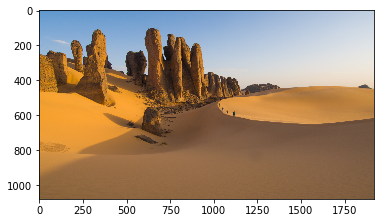

In [6]:
print("Image size: {}x{} pixels.".format(new_width, new_height))
_ = plt.imshow(resized_image)

We can time the resize in software operation.

In [7]:
%%timeit
resized_image = original_image.resize((new_width, new_height), Image.BILINEAR)

57.7 ms ± 459 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


[Contents](#Contents)

# References

https://pillow.readthedocs.io/en/3.1.x/index.html   
https://github.com/Xilinx/PYNQ/blob/master/docs/source/python_environment.ipynb   
https://github.com/Xilinx/PYNQ/blob/master/docs/source/jupyter_notebooks.ipynb   
https://github.com/Xilinx/PYNQ/blob/master/docs/source/jupyter_notebooks_advanced_features.ipynb   
https://pillow.readthedocs.io/en/latest/handbook/concepts.html#filters